# Trojan Detection

#### Loading and Displaying data

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/content/Trojan_Detection(cyber cop).csv", sep = r',', skipinitialspace = True)

df.head()

,id,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975.0,121.14.255.84,80.0,6.0,17/07/2017 01:18:33,10743584.0,4.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
1,72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169.0,172.217.6.226,443.0,17.0,17/07/2017 10:25:25,254217.0,6.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
2,96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749.0,10.42.0.1,53.0,17.0,30/06/2017 07:16:12,1023244.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352.0,10.42.0.1,53.0,17.0,13/07/2017 03:48:44,286483.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trojan
4,169326,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353.0,107.22.241.77,443.0,6.0,5/7/2017 10:47,65633087.0,12.0,...,32.0,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,Benign


#### Pre-Cleaning data

In [4]:
df = df.dropna()



df = df.replace("Trojan", 1)
df = df.replace("Benign", 0)

df.head()

,id,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,10.42.0.42-121.14.255.84-49975-80-6,10.42.0.42,49975.0,121.14.255.84,80.0,6.0,17/07/2017 01:18:33,10743584.0,4.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,72089,172.217.6.226-10.42.0.42-443-49169-17,10.42.0.42,49169.0,172.217.6.226,443.0,17.0,17/07/2017 10:25:25,254217.0,6.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,96676,10.42.0.1-10.42.0.42-53-37749-17,10.42.0.42,37749.0,10.42.0.1,53.0,17.0,30/06/2017 07:16:12,1023244.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,42891,10.42.0.1-10.42.0.42-53-41352-17,10.42.0.42,41352.0,10.42.0.1,53.0,17.0,13/07/2017 03:48:44,286483.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,169326,10.42.0.151-107.22.241.77-44353-443-6,10.42.0.151,44353.0,107.22.241.77,443.0,6.0,5/7/2017 10:47,65633087.0,12.0,...,32.0,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,0


#### Encoding

In [5]:
from sklearn import preprocessing

number = preprocessing.LabelEncoder()

df["Flow ID"] = number.fit_transform(df["Flow ID"])
df["Source IP"] = number.fit_transform(df["Source IP"])
df["Destination IP"] = number.fit_transform(df["Destination IP"])
df["Timestamp"] = number.fit_transform(df["Timestamp"])

df.head()

,id,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Class
0,73217,46111,7,49975.0,352,80.0,6.0,7173,10743584.0,4.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,72089,74905,7,49169.0,895,443.0,17.0,10145,254217.0,6.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,96676,9217,7,37749.0,7,53.0,17.0,13354,1023244.0,1.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,42891,10418,7,41352.0,7,53.0,17.0,789,286483.0,1.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,169326,20763,5,44353.0,220,443.0,6.0,13959,65633087.0,12.0,...,32.0,322594.0,0.0,322594.0,322594.0,60306983.0,0.0,60306983.0,60306983.0,0


Correlation Matrix:
                      id   Flow ID  Source IP  Source Port  Destination IP  \
id              1.000000  0.037031  -0.022495     0.008563       -0.033750   
Flow ID         0.037031  1.000000   0.112870     0.103560        0.346671   
Source IP      -0.022495  0.112870   1.000000    -0.631045       -0.183185   
Source Port     0.008563  0.103560  -0.631045     1.000000        0.361765   
Destination IP -0.033750  0.346671  -0.183185     0.361765        1.000000   
...                  ...       ...        ...          ...             ...   
Idle Mean      -0.032769  0.092910   0.000358     0.072186        0.178734   
Idle Std       -0.012942  0.058039   0.012840     0.024026        0.055889   
Idle Max       -0.033350  0.098547   0.002645     0.072227        0.178222   
Idle Min       -0.031681  0.085552  -0.002783     0.070705        0.173541   
Class          -0.855279 -0.044944   0.025708    -0.003135        0.038843   

                Destination Port  Protocol 

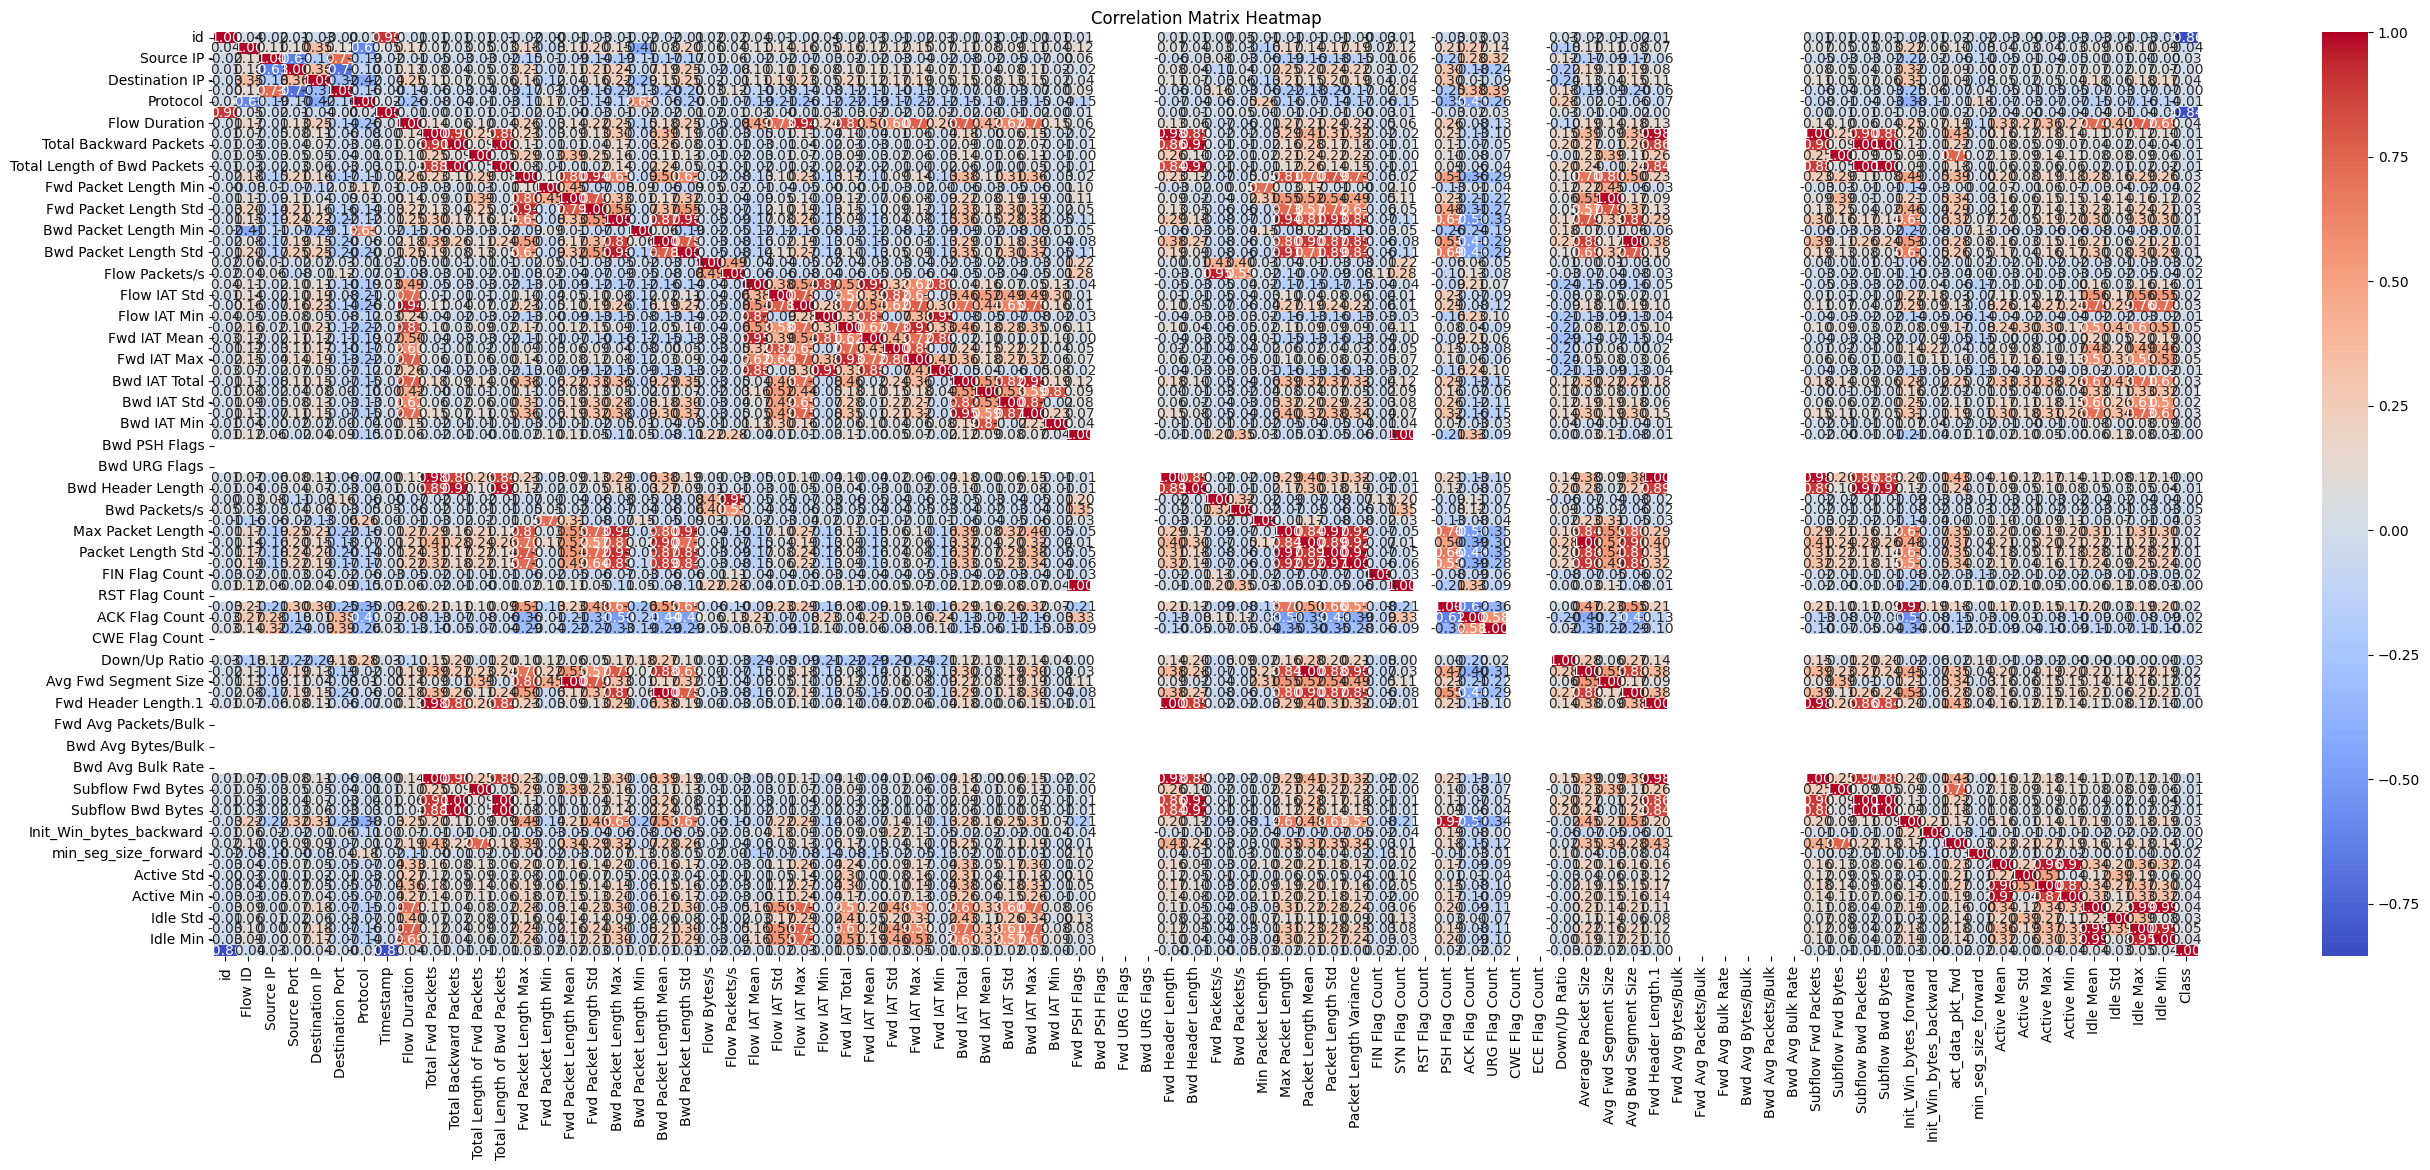

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(32, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

#### Defining X and y and Splitting data

In [7]:
from sklearn.model_selection import train_test_split

# Columns used as predictors
X = df.drop(["Class"], axis = 1).values

y = df["Class"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

In [11]:
# from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten, BatchNormalization, Dropout
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.optimizers import Adam

#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# define the model
#Experiment with deeper and wider networks
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

# BiLSTM layer
model.add(Bidirectional(LSTM(32, activation='relu', return_sequences=True)))
model.add(Dropout(0.3))

# Flatten layer to connect to Dense layers
model.add(Flatten())

# Hidden layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

#Output layer
model.add(Dense(1, activation='relu'))


# Define the optimizer with custom learning rate
optimizer = Adam(learning_rate=0.0001)  # You can adjust the learning rate as needed

# Compile the model with the customized optimizer
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

model.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 84, 32)            96        
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 42, 32)            0         
 g1D)                                                            
                                                                 
 bidirectional_2 (Bidirecti  (None, 42, 64)            16640     
 onal)                                                           
                                                                 
 dropout_6 (Dropout)         (None, 42, 64)            0         
                                                                 
 flatten_2 (Flatten)         (None, 2688)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [12]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =30, batch_size=128)

Epoch 1/30
1176/1176 [==============================] - 102s 83ms/step - loss: 0.5823 - accuracy: 0.7199 - val_loss: 0.2903 - val_accuracy: 0.9171
Epoch 2/30
1176/1176 [==============================] - 97s 83ms/step - loss: 0.2754 - accuracy: 0.9008 - val_loss: 0.1560 - val_accuracy: 0.9517
Epoch 3/30
1176/1176 [==============================] - 98s 84ms/step - loss: 0.1948 - accuracy: 0.9327 - val_loss: 0.0907 - val_accuracy: 0.9776
Epoch 4/30
1176/1176 [==============================] - 101s 86ms/step - loss: 0.1431 - accuracy: 0.9539 - val_loss: 0.0596 - val_accuracy: 0.9865
Epoch 5/30
1176/1176 [==============================] - 101s 85ms/step - loss: 0.0991 - accuracy: 0.9689 - val_loss: 0.0353 - val_accuracy: 0.9903
Epoch 6/30
1176/1176 [==============================] - 93s 79ms/step - loss: 0.0822 - accuracy: 0.9756 - val_loss: 0.0633 - val_accuracy: 0.9842
Epoch 7/30
1176/1176 [==============================] - 103s 87ms/step - loss: 0.0738 - accuracy: 0.9766 - val_loss: 0.02

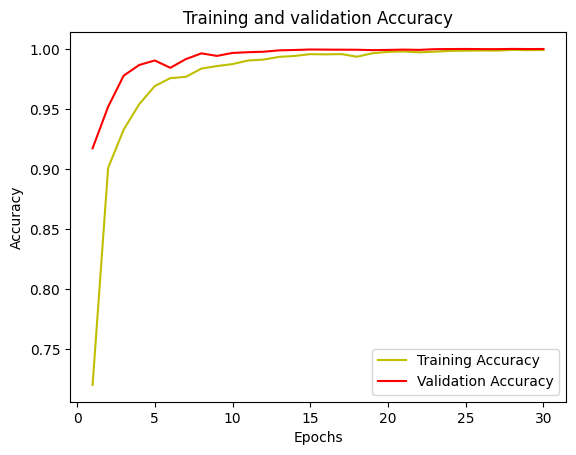

In [13]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training Accuracy')
plt.plot(epochs, val_loss, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
import pandas as pd

# Assuming df is your DataFrame
class_counts = df.iloc[:, -1].value_counts()

print("Number of occurrences of each class:")
print(class_counts)


Number of occurrences of each class:
Class
1    172679
0     95969
Name: count, dtype: int64


In [15]:
import pandas as pd

# Assuming df is your DataFrame
class_counts = df.iloc[:, -1].value_counts(normalize=True) * 100

print("Percentage of occurrences of each class:")
print(class_counts)


Percentage of occurrences of each class:
Class
1    64.277047
0    35.722953
Name: proportion, dtype: float64


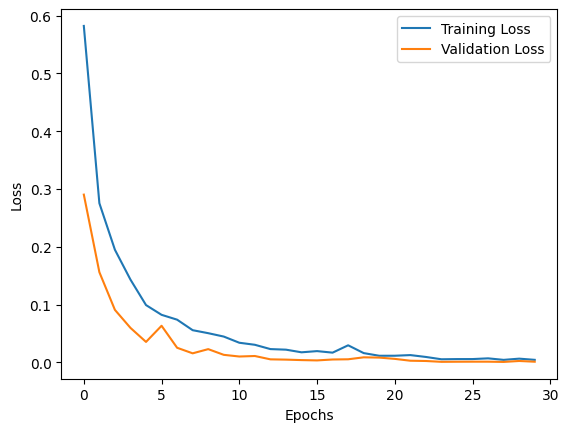

2519/2519 [==============================] - 30s 12ms/step


In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



# Test the model
y_pred_probs = model.predict(X_test_scaled)



In [17]:
# Min-Max scaling
def min_max_scaling(x):
    min_val = min(x)
    max_val = max(x)
    scaled = [(i - min_val) / (max_val - min_val) for i in x]
    return scaled

# Normalize y_pred_probs
y_pred_probs_normalized = min_max_scaling(y_pred_probs)

In [18]:
y_pred_probs_normalized

[array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.26874456], dtype=float32),
 array([0.], dtype=float32),
 array([0.52373004], dtype=float32),
 array([0.48504788], dtype=float32),
 array([0.6624393], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.3987915], dtype=float32),
 array([0.63529176], dtype=float32),
 array([0.], dtype=float32),
 array([0.79219866], dtype=float32),
 array([0.37142292], dtype=float32),
 array([0.65285844], dtype=float32),
 array([0.3828428], dtype=float32),
 array([0.66646284], dtype=float32),
 array([0.], dtype=float32),
 array([0.2298261], dtype=float32),
 array([0.5044077], dtype=float32),
 array([0.542431], dtype=float32),
 array([0.52730995], dtype=float32),
 array([0.46768668], dtype=float32),
 array([0.32465413], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.56748116], dtype=float32),
 array([0.], dtype=float32),
 array([0.], dtype=float32),
 array([0.6882848], dt

In [19]:
# Convert probabilities to binary predictions
def binarize_predictions(probs, threshold=0.01):
    binary_predictions = [1 if prob >= threshold else 0 for prob in probs]
    return binary_predictions

# Define threshold
threshold = 0.01

# Convert probabilities to binary predictions using the defined threshold
y_pred_binary = binarize_predictions(y_pred_probs_normalized, threshold)

In [20]:
y_pred_binary

[0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,


In [21]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9997394379303927
Precision: 0.9995938340135002
Recall: 1.0
F1 Score: 0.9997968757556706
ROC AUC Score: 0.9996368415591602
Confusion Matrix:
 [[28892    21]
 [    0 51682]]


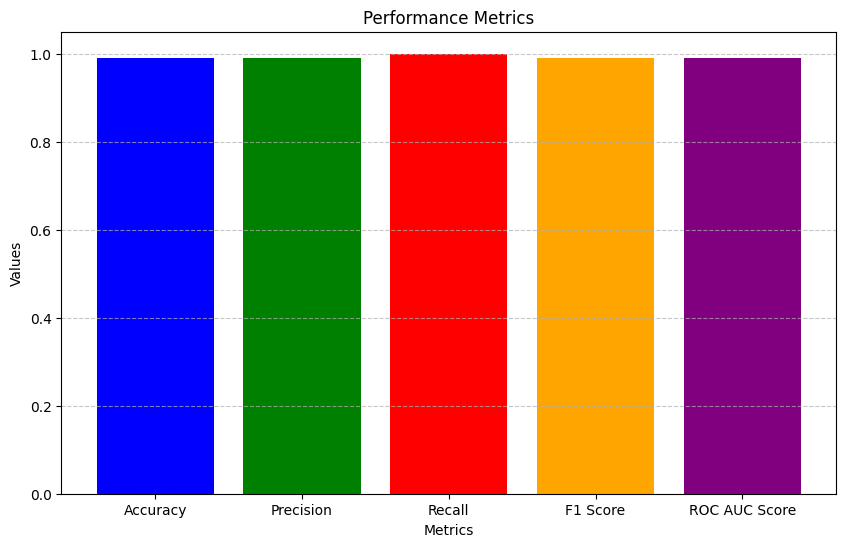

In [22]:
import matplotlib.pyplot as plt

# List of metric names
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC Score"]

# List of metric values
accuracy = 0.99
precision = 0.99
recall = 1.0
f1 = 0.99
roc_auc = 0.99
values = [accuracy, precision, recall, f1, roc_auc]

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.title('Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


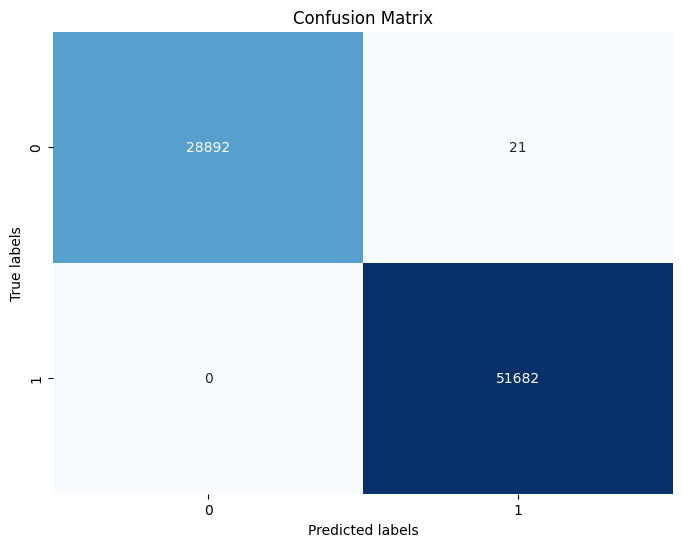

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28913
           1       1.00      1.00      1.00     51682

    accuracy                           1.00     80595
   macro avg       1.00      1.00      1.00     80595
weighted avg       1.00      1.00      1.00     80595

Accuracy: 0.99
Precision: 0.99
Recall: 1.0
F1 Score: 0.99
ROC AUC Score: 0.99


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


print(classification_report(y_test, y_pred_binary))
# Print other metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

In [ ]:
!pip install tabulate


In [ ]:
from tabulate import tabulate

# Assuming y_pred_binary and y_test are lists or arrays containing binary predictions and actual values respectively
# Create a table with Predicted vs Actual values for the first 20 rows
table = [["Predicted", "Actual"]]
for pred, actual in zip(y_pred_binary[:20], y_test[:20]):
    table.append([pred, actual])

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="grid"))


+-------------+----------+
|   Predicted |   Actual |
+=============+==========+
|           0 |        0 |
+-------------+----------+
|           0 |        0 |
+-------------+----------+
|           1 |        1 |
+-------------+----------+
|           0 |        0 |
+-------------+----------+
|           1 |        1 |
+-------------+----------+
|           1 |        1 |
+-------------+----------+
|           1 |        1 |
+-------------+----------+
|           0 |        0 |
+-------------+----------+
|           0 |        0 |
+-------------+----------+
|           1 |        1 |
+-------------+----------+
|           1 |        1 |
+-------------+----------+
|           0 |        0 |
+-------------+----------+
|           1 |        1 |
+-------------+----------+
|           1 |        1 |
+-------------+----------+
|           1 |        1 |
+-------------+----------+
|           1 |        1 |
+-------------+----------+
|           1 |        1 |
+-------------+----------+
|

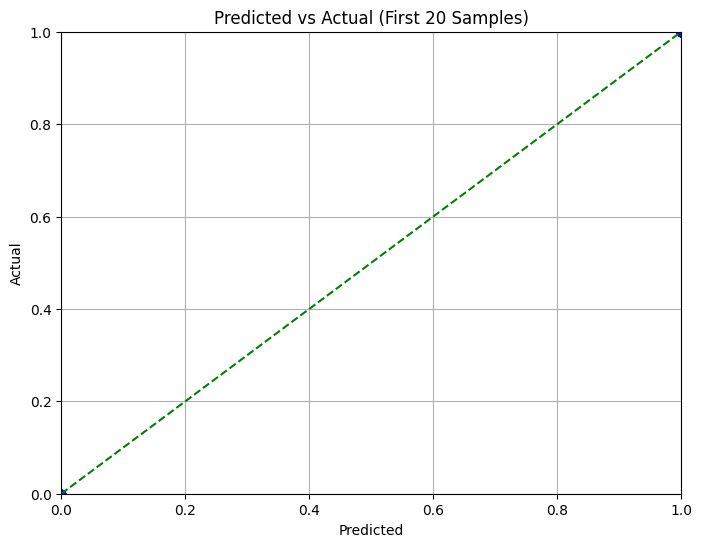

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_pred_binary and y_test are lists or arrays containing binary predictions and actual values respectively
# Extracting the first 20 predictions and actual values
y_pred_sample = y_pred_binary[:20]
y_test_sample = y_test[:20]

# Creating a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_sample, y_test_sample, color='blue')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')  # Plotting the diagonal line
plt.title('Predicted vs Actual (First 20 Samples)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()


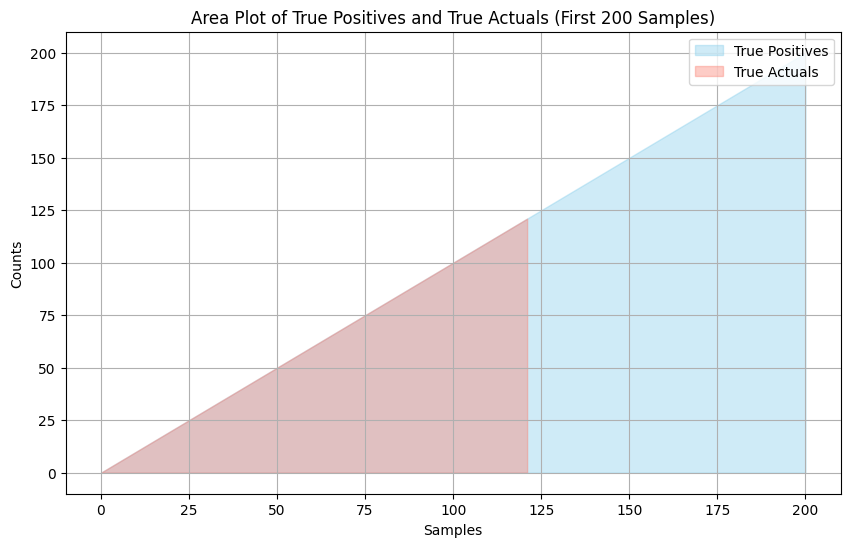

In [24]:
import matplotlib.pyplot as plt

# Assuming y_pred_binary and y_test are lists or arrays containing binary predictions and actual values respectively
y_pred_binary_sample = y_pred_binary[:200]
y_test_sample = y_test[:200]

# Calculate True Positives
true_positives = [(y_pred, y_actual) for y_pred, y_actual in zip(y_pred_binary_sample, y_test_sample) if y_pred == y_actual]
true_positives_count = [0]
cumulative_true_positives = 0
for pred, actual in true_positives:
    cumulative_true_positives += 1
    true_positives_count.append(cumulative_true_positives)

# Calculate True Actuals
true_actuals = [(y_pred, y_actual) for y_pred, y_actual in zip(y_pred_binary_sample, y_test_sample) if y_actual == 1]
true_actuals_count = [0]
cumulative_true_actuals = 0
for pred, actual in true_actuals:
    cumulative_true_actuals += 1
    true_actuals_count.append(cumulative_true_actuals)

# Plot Area Plot
plt.figure(figsize=(10, 6))
plt.fill_between(range(len(true_positives_count)), true_positives_count, color='skyblue', alpha=0.4, label='True Positives')
plt.fill_between(range(len(true_actuals_count)), true_actuals_count, color='salmon', alpha=0.4, label='True Actuals')
plt.title('Area Plot of True Positives and True Actuals (First 200 Samples)')
plt.xlabel('Samples')
plt.ylabel('Counts')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from tabulate import tabulate

# Map binary predictions and actual values to corresponding labels
def map_labels(value):
    return "Trojan" if value == 1 else "Benign"

# Create a table with Predicted vs Actual values for the first 20 rows
table = [["Predicted", "Actual"]]
for pred, actual in zip(y_pred_binary[:20], y_test[:20]):
    table.append([map_labels(pred), map_labels(actual)])

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="grid"))


+-------------+----------+
| Predicted   | Actual   |
+=============+==========+
| Benign      | Benign   |
+-------------+----------+
| Benign      | Benign   |
+-------------+----------+
| Trojan      | Trojan   |
+-------------+----------+
| Benign      | Benign   |
+-------------+----------+
| Trojan      | Trojan   |
+-------------+----------+
| Trojan      | Trojan   |
+-------------+----------+
| Trojan      | Trojan   |
+-------------+----------+
| Benign      | Benign   |
+-------------+----------+
| Benign      | Benign   |
+-------------+----------+
| Trojan      | Trojan   |
+-------------+----------+
| Trojan      | Trojan   |
+-------------+----------+
| Benign      | Benign   |
+-------------+----------+
| Trojan      | Trojan   |
+-------------+----------+
| Trojan      | Trojan   |
+-------------+----------+
| Trojan      | Trojan   |
+-------------+----------+
| Trojan      | Trojan   |
+-------------+----------+
| Trojan      | Trojan   |
+-------------+----------+
|

In [ ]:
y_pred_train = model.predict(X_train_scaled)

5877/5877 [==============================] - 61s 10ms/step


In [ ]:
# Min-Max scaling
def min_max_scaling(x):
    min_val = min(x)
    max_val = max(x)
    scaled = [(i - min_val) / (max_val - min_val) for i in x]
    return scaled

# Normalize y_pred_probs
y_pred_train_normalized = min_max_scaling(y_pred_train)

In [ ]:
# Convert probabilities to binary predictions
def binarize_predictions(probs, threshold=0.01):
    binary_predictions = [1 if prob >= threshold else 0 for prob in probs]
    return binary_predictions

# Define threshold
threshold = 0.01

# Convert probabilities to binary predictions using the defined threshold
y_pred_binary = binarize_predictions(y_pred_train_normalized, threshold)

In [ ]:
y_pred_binary

[0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,


In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_train, y_pred_binary)
precision = precision_score(y_train, y_pred_binary)
recall = recall_score(y_train, y_pred_binary)
f1 = f1_score(y_train, y_pred_binary)
roc_auc = roc_auc_score(y_train, y_pred_binary)
conf_matrix = confusion_matrix(y_train, y_pred_binary)


print("Train Accuracy:", accuracy)
print("Train Precision:", precision)
print("Train Recall:", recall)
print("Train F1 Score:", f1)
print("Train ROC AUC Score:", roc_auc)
print("Train Confusion Matrix:\n", conf_matrix)

Train Accuracy: 0.9910503953672635
Train Precision: 0.9872266052498325
Train Recall: 0.9990165045414349
Train F1 Score: 0.9930865637798381
Train ROC AUC Score: 0.9878463577348073
Train Confusion Matrix:
 [[ 65492   1564]
 [   119 120878]]


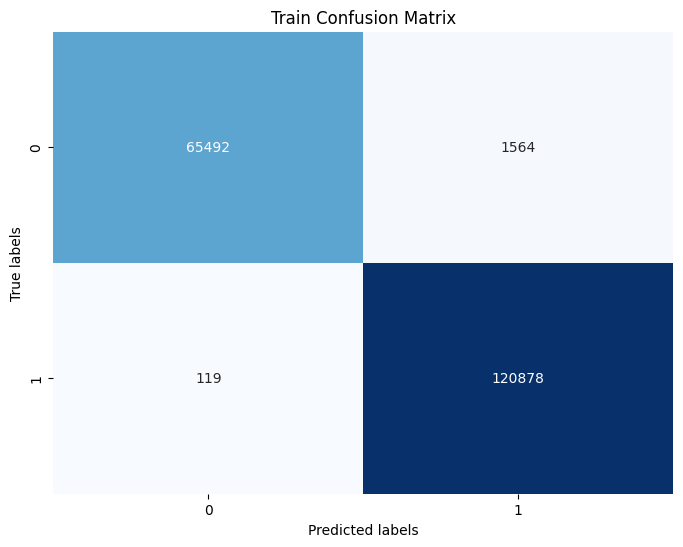

Accuracy: 0.9910503953672635
Precision: 0.9872266052498325
Recall: 0.9990165045414349
F1 Score: 0.9930865637798381
ROC AUC Score: 0.9878463577348073


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, confusion_matrix, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Train Confusion Matrix')
plt.show()



# Print other metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)